# Train diabetes classification model

This notebook reads a CSV file and trains a model to predict diabetes in patients. The data is already preprocessed and requires no feature engineering.



## Read data from local file



In [1]:
!pip install scikit-learn
!pip install joblib

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as pl

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


## Split data

In [7]:
X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values

In [10]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([6656, 3344]))


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Train model

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [22]:
print("Best parameters found:", grid_search.best_params_)
print("Best AUC score on validation set:", grid_search.best_score_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC score on validation set: 0.983324434159773


## Evaluate model

In [23]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [24]:
y_hat = best_model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

Accuracy: 0.9353333333333333


In [25]:
y_scores = best_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC:', auc)

AUC: 0.979856460520424


Text(0.5, 1.0, 'ROC Curve')

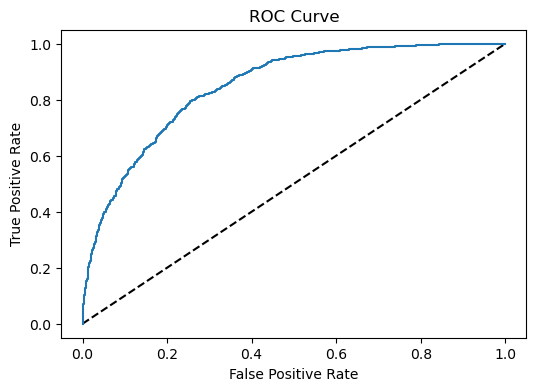

In [18]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')